In [1]:
import pandas as pa
import seaborn as sns
import nltk
import regex as re
from collections import Counter

from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [26]:
df = pa.read_csv('Airline_review.csv')

In [27]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [28]:
df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [30]:
df.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
df.dtypes

Unnamed: 0                  int64
Airline Name               object
Overall_Rating             object
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object

## Check for null

In [35]:
df.isna().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [59]:
df['Review']=df['Review'].str.upper()

In [61]:
df['length'] = df['Review'].str.len()
df.describe()

,Unnamed: 0,length
count,23171.00000,23171.000000
mean,11585.00000,721.819559
std,6689.03588,537.623422
min,0.00000,14.000000
25%,5792.50000,361.000000
50%,11585.00000,561.000000
75%,17377.50000,904.500000
max,23170.00000,5086.000000


<Axes: >

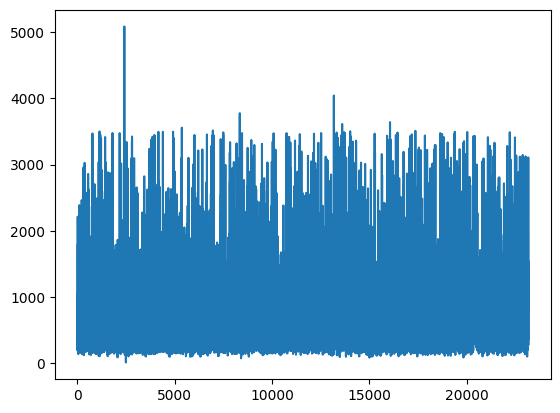

In [62]:
df['length'].plot()

<Axes: >

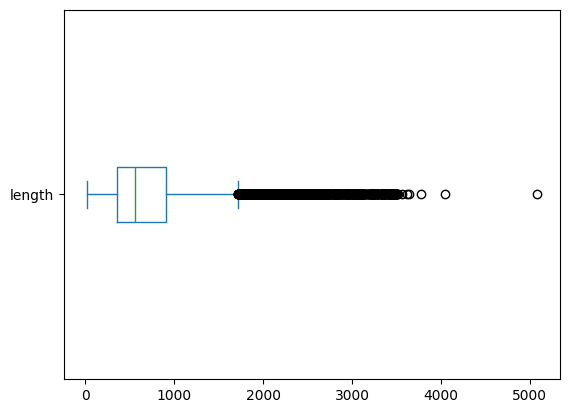

In [63]:
df['length'].plot(kind='box', vert=False)

## Histogram

<Axes: ylabel='Frequency'>

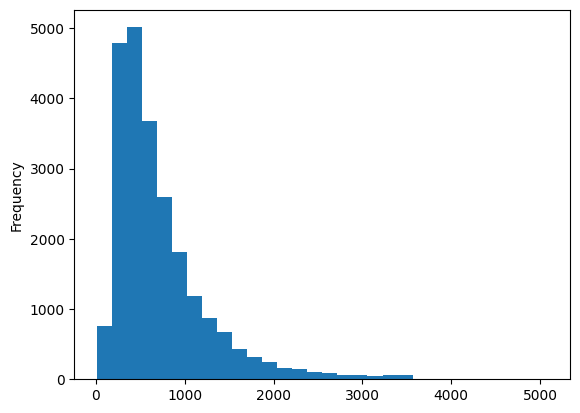

In [64]:
df['length'].plot(kind='hist', bins=30)

## Tokenization

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'about', 'after', 'y', 'of', 'the', 'few', 'theirs', 'against', 'yourself', 'nor', 'any', 'can', 'those', 't', 'in', 'won', 'for', 'hers', 'are', 'again', 'during', 'being', 'own', 'had', "needn't", 'you', 'herself', 'ours', 'm', 'has', 'they', 'some', 'it', 'these', 'while', 've', 'there', 'other', "haven't", "mustn't", 'who', 'were', 'where', 'don', 'as', "hadn't", 'wouldn', 'she', 'weren', 'our', 'my', 'up', 'more', 'all', 'here', 'or', 'do', 'than', "that'll", 'most', 'very', 'himself', 'her', 'having', 'couldn', 'just', 'shouldn', 's', 'before', 'll', 're', 'itself', 'if', 'them', 'we', 'not', "mightn't", 'him', "doesn't", 'below', 'hasn', 'did', 'mustn', 'doesn', 'now', 'each', 'yours', 'your', 'how', "isn't", "wasn't", 'should', 'whom', 'this', 'down', 'further', 'same', 'so', "you've", 'such', "you'd", 'shan', "it's", "you're", 'he', 'does', 'ourselves', 'yourselves', 'that', 'into', 'by', 'ain', 'with', 'aren', "shan't", 'what', 'too', 'isn', 'only', 'be', 'wasn', "weren't", 

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [65]:
def tokenize(Review):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Review)

In [66]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)

In [67]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [68]:
pipeline = [str.lower, tokenize, remove_stop]

In [69]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [71]:
df['tokens'] = df['Review'].apply(prepare, pipeline=pipeline)

In [72]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended,length,tokens,num_tokens
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,BANGKOK TO TOKYO. I’VE FLOWN MANY LOW COST AI...,no,803,"[bangkok, tokyo, flown, many, low, cost, airli...",68
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,AVOID AT ALL COSTS. I BOOKED FLIGHTS TO GO F...,no,777,"[avoid, costs, booked, flights, go, singapore,...",64
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,FLIGHT WAS LEAVING AT 23.15 AND AFTER AN HOU...,no,906,"[flight, leaving, hour, half, flying, get, bac...",76
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,ZIPAIR IS JAL’S BUDGET AIRLINE. THEY DON’T HA...,yes,3109,"[zipair, jal, budget, airline, classes, travel...",294
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,THEY LIED ABOUT CONNECTION IN NARITA AND WE ...,no,294,"[lied, connection, narita, lost, money, refund...",20


# Word frequencyAnalysis

In [73]:
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [74]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [75]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('flight', 42590), ('airline', 12841), ('service', 12780), ('time', 12387), ('us', 9543)]


In [76]:
freq_df = pa.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [77]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
flight,42590
airline,12841
service,12780
time,12387
us,9543
would,8972
one,8578
airport,8501
staff,8423


In [78]:
freq_df.describe()

,freq
count,37080.000000
mean,40.885437
std,364.432439
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,42590.000000


## BarChart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

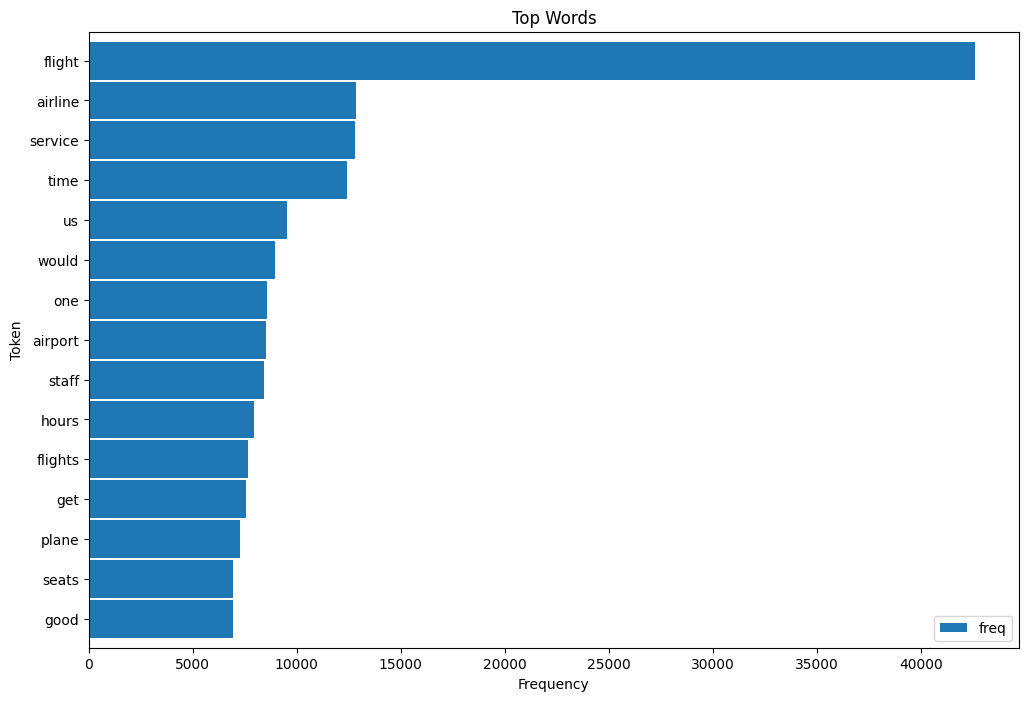

In [79]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [83]:
df['Overall_Rating'] = pa.to_numeric(df['Overall_Rating'], errors='coerce')

In [84]:
text = df.query("Overall_Rating>1")['Review'].values[0]

# WorldCloud

(-0.5, 399.5, 199.5, -0.5)

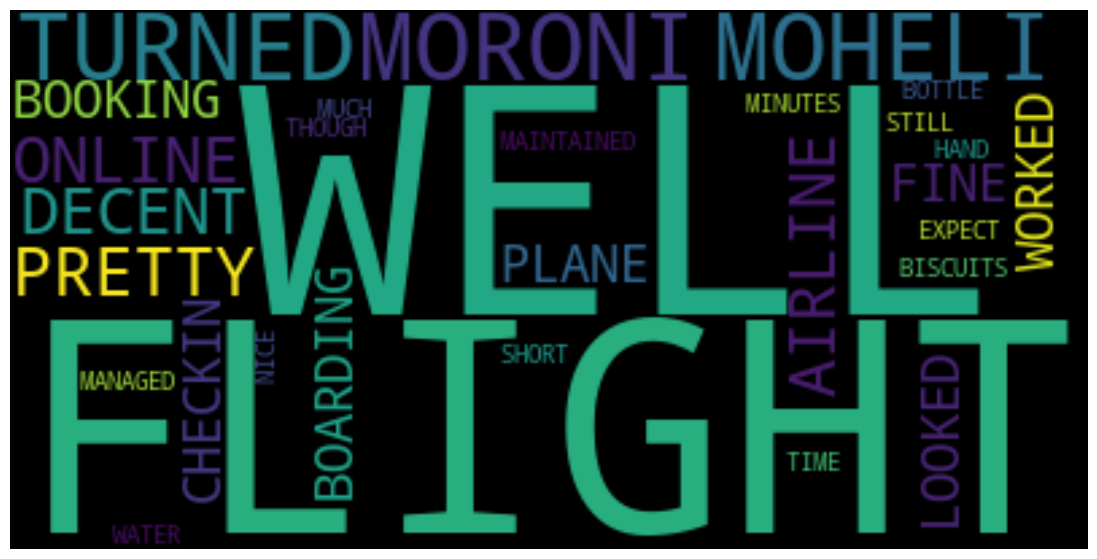

In [85]:
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

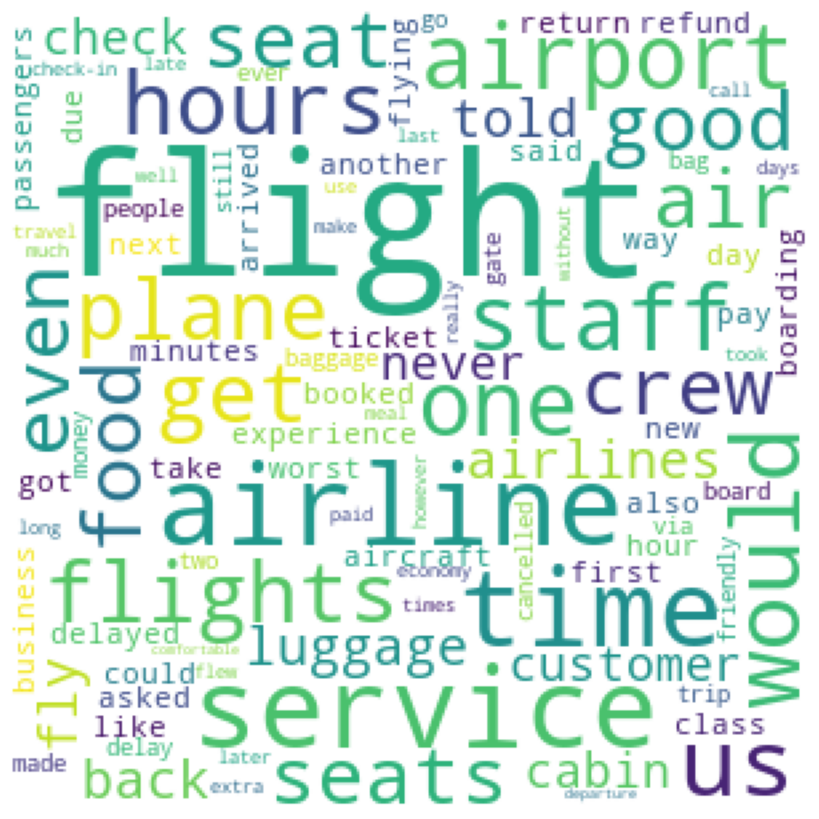

In [86]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()